In [1]:
import os, h5py, math
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## View Subset of h5

(1080, 1080, 1)


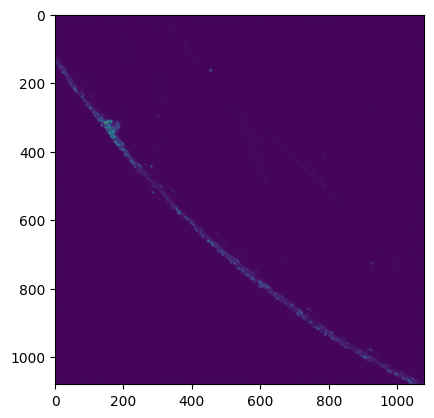

In [3]:
file = "/home/brian/data4/brian/PBnJ/jelly_h5s/fully_labeled_first_ds/train_unpad/moving_images.h5"
# prob = "1019to13891" #None
prob = None


with h5py.File(file, 'r') as f:
    if not prob:
        prob = list(f.keys())[0]

    img = f[prob][:]
    print(img.shape)

plt.imshow(img)
plt.show()

### Overlay with labels

In [89]:
count = 0

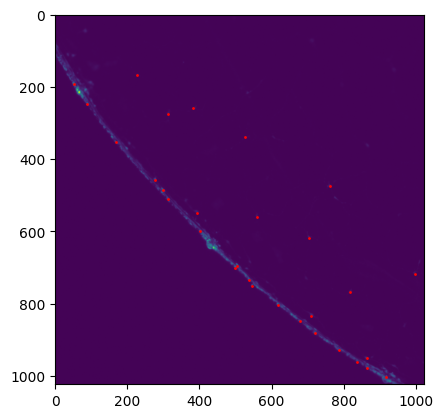

In [102]:
# img_file = "/home/brian/data4/brian/PBnJ/jelly_h5s/both_datasets/fixed_images.h5"
img_file = "/home/brian/data4/brian/PBnJ/jelly_h5s/both_datasets_rotated/cropped/padded/val/fixed_images.h5"
label_file = img_file.replace("image", "label")
prob = None
# prob = "1019to13891"

with h5py.File(img_file, 'r') as f, h5py.File(label_file, 'r') as lf:
    if not prob:
        prob = list(f.keys())[count]

    img = f[prob][...,1]
    labs = lf[prob][:]

plt.imshow(img)
plt.scatter(labs[:,0],labs[:,1], c='r', s=1)

count += 1

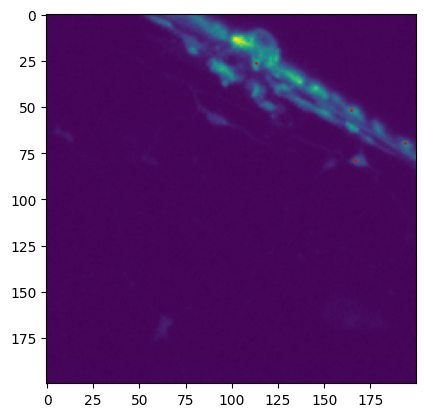

In [44]:
img_file = "/home/brian/data4/brian/PBnJ/jelly_h5s/both_datasets/fixed_images.h5"
label_file = img_file.replace("image", "label")
# prob = None
prob = "1019to13891"

with h5py.File(img_file, 'r') as f, h5py.File(label_file, 'r') as lf:
    if not prob:
        prob = list(f.keys())[0]

    img = f[prob][:][:200, :200]
    labs = lf[prob][:]

# xs = [x for x in labs[:,0] if x < 200]
# ys = [y for y in labs[:,0] if y < 200]

labs = labs[(labs[:, 0] < 200) & (labs[:, 1] < 200)]

plt.imshow(img)
# plt.scatter(xs,ys, c='r', s=1)
plt.scatter(labs[:,0]-1,labs[:,1]-1, c='r', s=1)

# plt.gca().invert_yaxis()

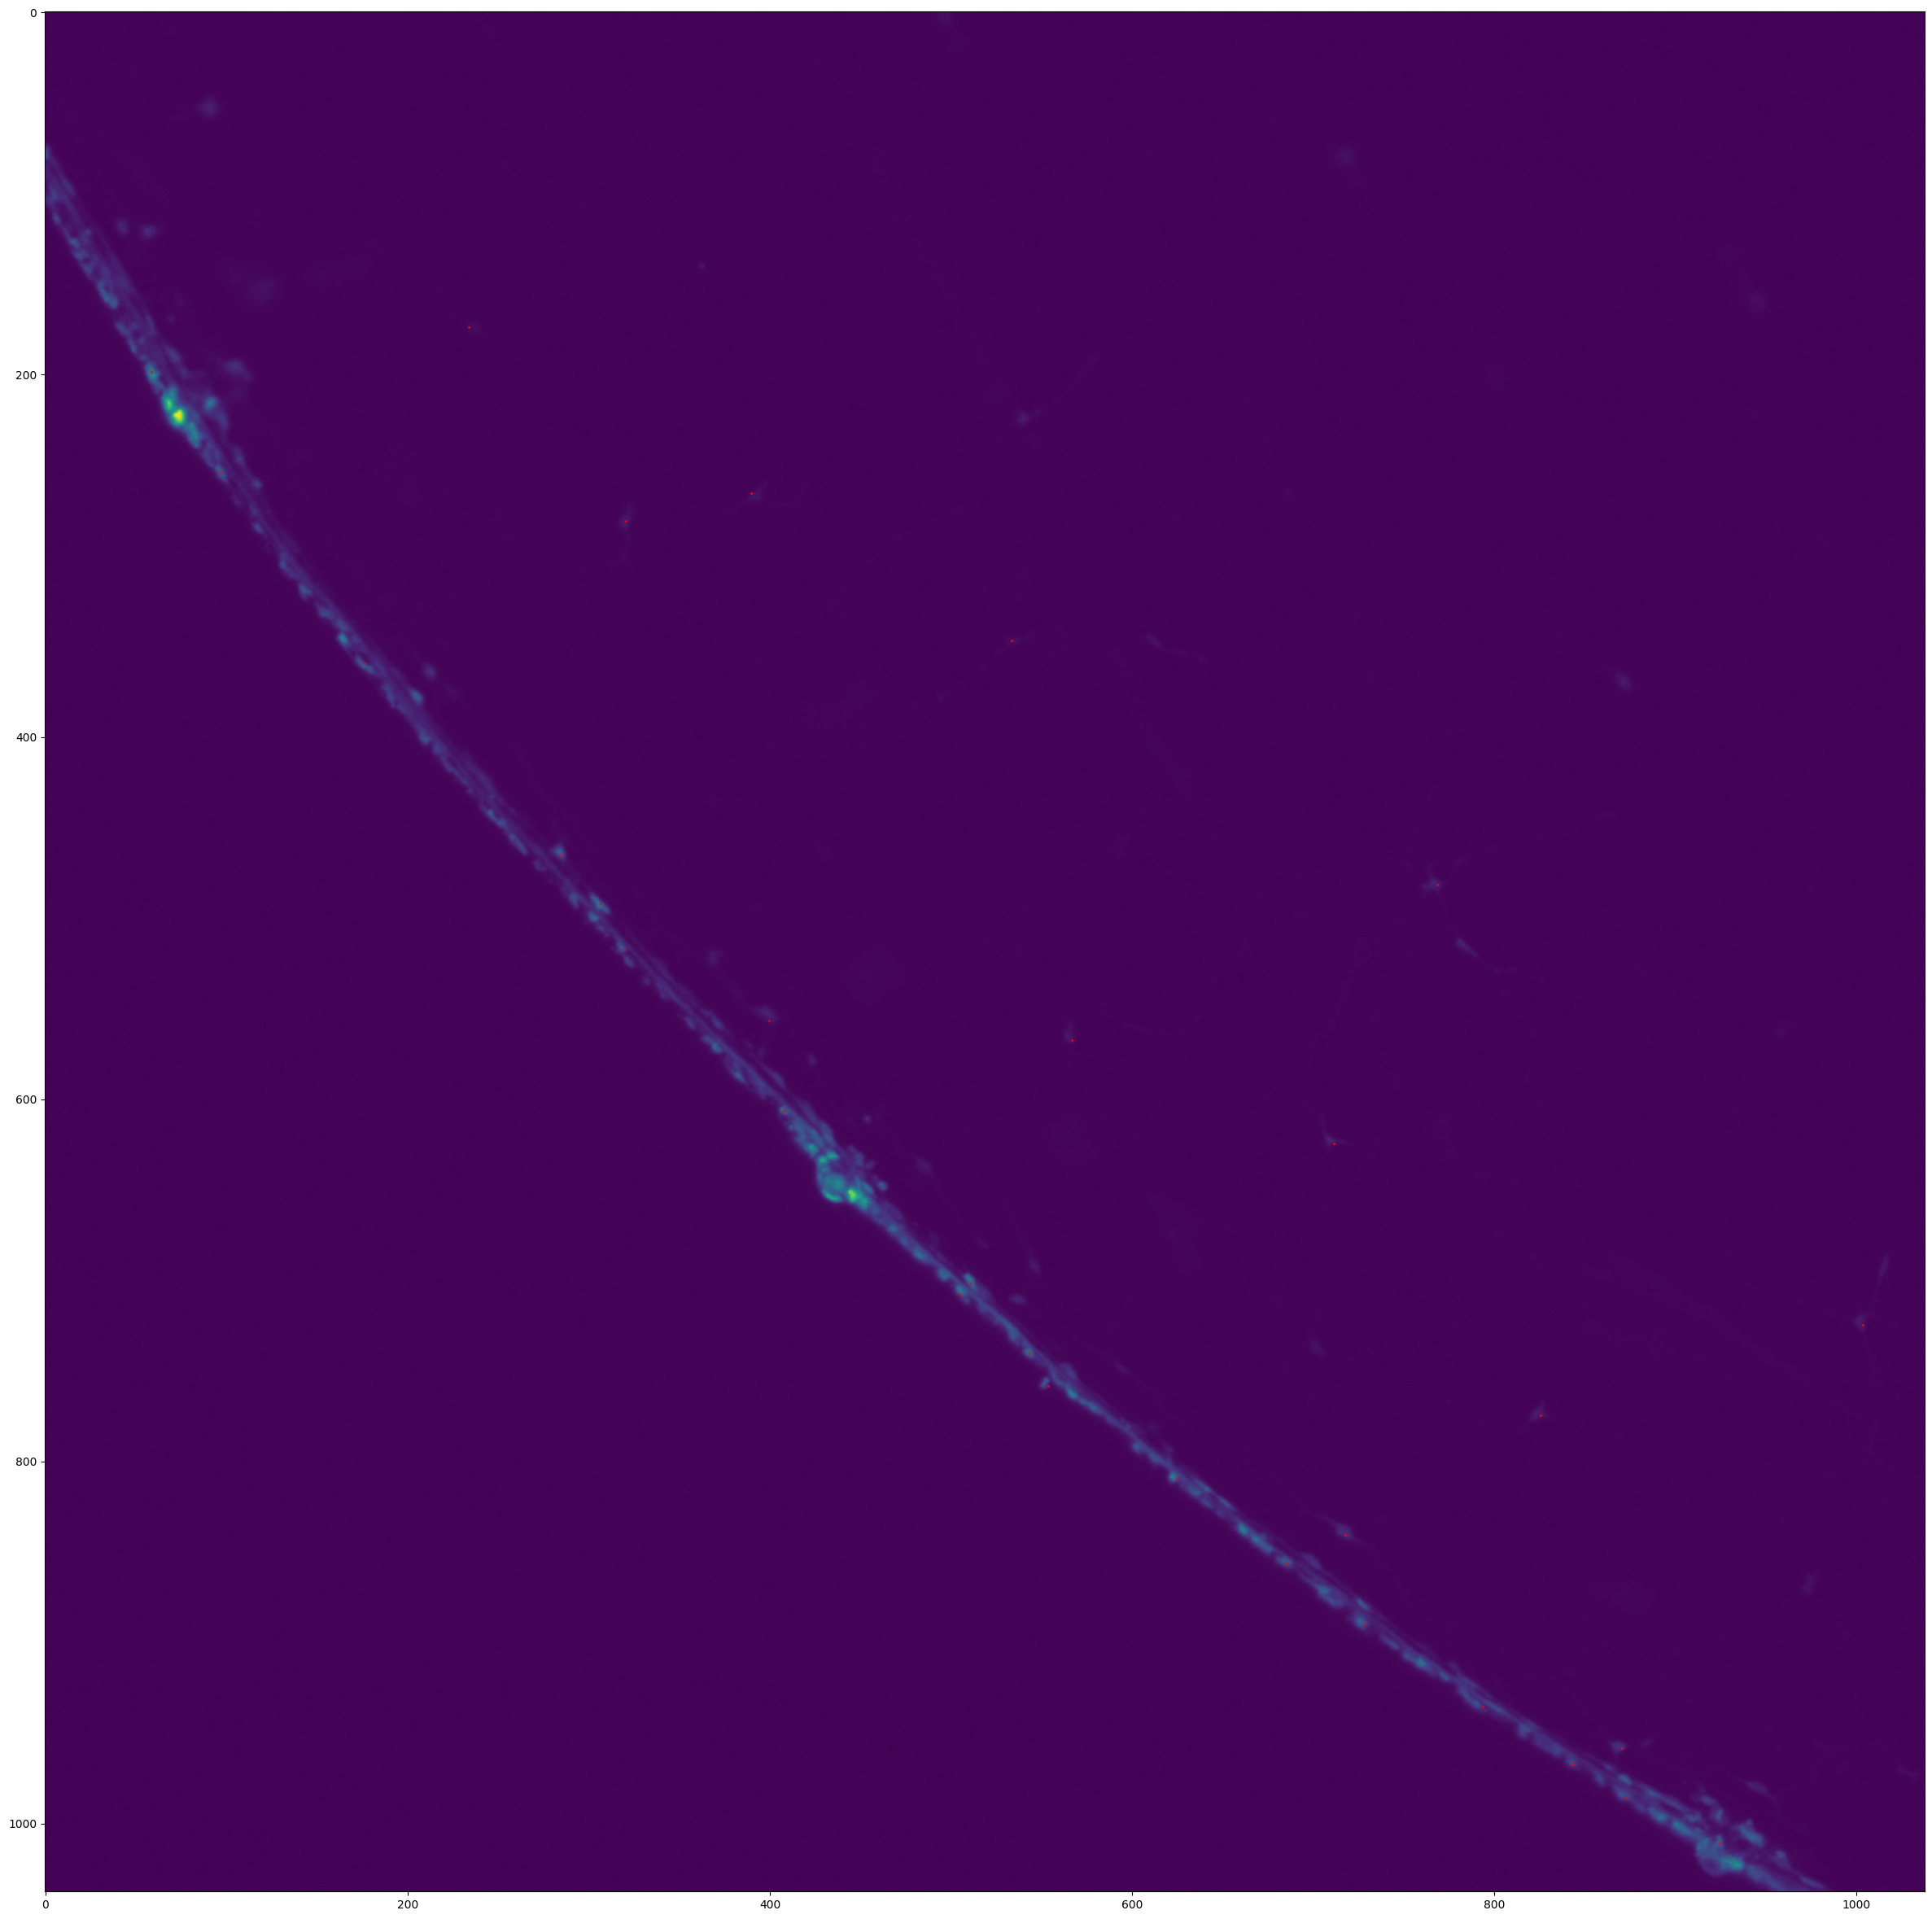

In [47]:
img_file = "/home/brian/data4/brian/PBnJ/jelly_h5s/both_datasets/fixed_images.h5"
label_file = img_file.replace("image", "label")
# prob = None
prob = "1019to13891"

with h5py.File(img_file, 'r') as f, h5py.File(label_file, 'r') as lf:
    if not prob:
        prob = list(f.keys())[0]

    img = f[prob][:]
    labs = lf[prob][:]

img = np.rot90(img, 2, axes=(0,1))
# img = np.flip(np.flip(img, 1), 0)

mid = np.array(img.shape[:2]) / 2
labs[:,:2] = (-1 * (labs[:, :2] - mid)) + mid

plt.figure(figsize=(30,30))

plt.imshow(img)
plt.scatter(labs[:,0],labs[:,1], c='r', s=1)

In [40]:
mid

array([519., 519.])

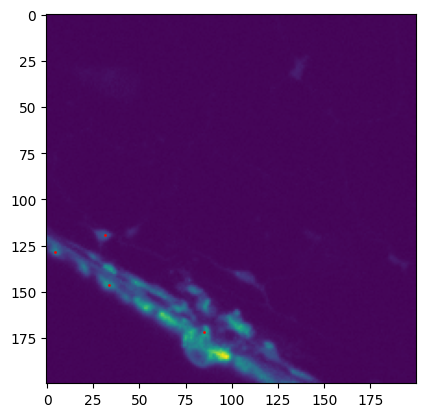

In [48]:

labs = labs[(labs[:, 0] > 838) & (labs[:, 1] > 838)]

plt.imshow(img[838:, 838:])
# plt.scatter(xs,ys, c='r', s=1)
plt.scatter(labs[:,0]-839,labs[:,1]-839, c='r', s=1)


## Get label dist

In [10]:
folder = "/home/brian/data4/brian/PBnJ/jelly_h5s/both_datasets/cropped/padded/val"
fixed_lab_file = os.path.join(folder, "fixed_labels.h5")
moving_lab_file = os.path.join(folder, "moving_labels.h5")

# prob = "1019to13891" #None


with h5py.File(fixed_lab_file, 'r') as fl, h5py.File(moving_lab_file, 'r') as ml:
    for prob in list(fl.keys()):
        if not np.all(fl[prob][:] == -1):
            dist = math.sqrt(np.sum(np.power(fl[prob][:] - ml[prob][:], 2)))
            
            print(f"{prob} - {dist}")


10078to15011 - 52.387975719624826
1019to13891 - 48.68264577855234
10317to13891 - 46.636895265444075
10411to15011 - 52.426138518872435
10412to15011 - 76.34788798650555
10419to15011 - 70.15340333868343
10423to15011 - 67.26812023536856
10456to15011 - 74.03208763772639
10459to15011 - 83.41762403713018
10523to15011 - 95.84362263604189
11773to13891 - 50.327998884797566
11844to13891 - 49.61732374311879
11884to13891 - 33.481338085566414
11905to13891 - 31.09121827360116
12037to13891 - 19.78198251417845
12149to13891 - 26.795522013948524
12160to13891 - 19.882660133021517
12233to15011 - 30.995967479657736
13626to15011 - 14.534441853748634
144to13891 - 117.89234223686056


In [11]:
folder = "/home/brian/data4/brian/PBnJ/jelly_h5s/both_datasets/"
folder = "/home/brian/data4/brian/PBnJ/jelly_h5s/second_dataset/cropped/padded/val"
fixed_lab_file = os.path.join(folder, "fixed_labels.h5")
moving_lab_file = os.path.join(folder, "moving_labels.h5")

# prob = "1019to13891" #None


with h5py.File(fixed_lab_file, 'r') as fl, h5py.File(moving_lab_file, 'r') as ml:
    for prob in list(fl.keys()):
        if not np.all(fl[prob][:] == -1):
            dist = math.sqrt(np.sum(np.power(fl[prob][:] - ml[prob][:], 2)))
            
            print(f"{prob} - {dist}")


1019to13891 - 48.68264577855234
10317to13891 - 46.636895265444075
11773to13891 - 50.327998884797566
11844to13891 - 49.61732374311879
11884to13891 - 33.481338085566414
11905to13891 - 31.09121827360116
12037to13891 - 19.78198251417845
12149to13891 - 26.795522013948524
12160to13891 - 19.882660133021517
144to13891 - 117.89234223686056


## Centroid Layer Changer

In [12]:
relative = False
folder = "/home/brian/data4/brian/PBnJ/jelly_h5s/fully_labeled_first_ds/val_unpad"
axis = 2 # z
new_layer = 0
offset = 0

for file in os.listdir(folder):
    if "label" not in file:
        continue
    
    with h5py.File(os.path.join(folder, file), 'r+') as f:
        for prob in f.keys():
            data = f[prob]       # load the data
            labs = data[:]
            neg_mask = labs == -1
            if relative:
                assert offset != None and offset != 0
                raise NotImplementedError()

            else:
                assert new_layer != None
                labs[:, axis] = new_layer

            labs[neg_mask] = -1
            data[...] = labs # Update inplace
        f.close()



## Delete Label Row

In [9]:
file = "/home/brian/data4/brian/PBnJ/tentacles/tents_4lab/labs/moving_labels.h5"
# prob = "1061to1793"
# row = 12

to_remove = [("1061to1793", 12), ("1849to4834", 10)]

with h5py.File(file, "r+") as f:
    for prob, row in to_remove:
        dat = f[prob]
        dat_new = np.vstack([dat[:row], dat[row + 1:]])
        dat[:-1] = dat_new
        # dat[...]
    f.close()


In [10]:
file = "/home/brian/data4/brian/PBnJ/tentacles/tents_4lab/labs/fixed_labels.h5"
# prob = "1061to1793"
# row = 12

to_remove = [("1849to4834", 10)]

with h5py.File(file, "r+") as f:
    for prob, row in to_remove:
        dat = f[prob]
        dat_new = np.vstack([dat[:row], dat[row + 1:]])
        dat[:-1] = dat_new
        # dat[...]
    f.close()


Add -1s

In [ ]:
in_dir = "/home/brian/data4/brian/PBnJ/archive_pre_datadump/jelly_processed_data/h5"
out_dir = "/home/brian/data4/brian/PBnJ/jelly_h5s/fully_labeled_first_ds/val"
padding = np.array([[0,70],[0,0]])

with h5py.File(os.path.join(in_dir, "fixed_labels.h5"), 'r') as lf, h5py.File(os.path.join(in_dir, "moving_labels.h5"), 'r') as lm:
    with h5py.File(os.path.join(out_dir, "fixed_labels.h5"), 'w-') as olf, h5py.File(os.path.join(out_dir, "moving_labels.h5"), 'w-') as olm:
        for prob in lf.keys():
            labs = lf[prob][:]
            labs = np.pad(labs, padding, "constant", constant_values=-1)
            olf.create_dataset(prob, data=labs)

            labs = lm[prob][:]
            labs = np.pad(labs, padding, "constant", constant_values=-1)
            olm.create_dataset(prob, data=labs)

## Subset z layers

In [7]:
in_dir = "/home/brian/data4/brian/PBnJ/jelly_h5s/fully_labeled_first_ds/train"
out_dir = "/home/brian/data4/brian/PBnJ/jelly_h5s/fully_labeled_first_ds/train_unpad"
z_slice = 1

with h5py.File(os.path.join(in_dir, "fixed_images.h5"), 'r') as lf, h5py.File(os.path.join(in_dir, "moving_images.h5"), 'r') as lm:
    with h5py.File(os.path.join(out_dir, "fixed_images.h5"), 'w') as olf, h5py.File(os.path.join(out_dir, "moving_images.h5"), 'w') as olm:
        for prob in lf.keys():
            img = lf[prob][...,z_slice:z_slice+1]
            olf.create_dataset(prob, data=img)

            img = lm[prob][...,z_slice:z_slice+1]
            olm.create_dataset(prob, data=img)